In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [2]:
from scipy.cluster.vq import whiten, kmeans2

In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '6343e2401b274e4b9d3233b7291115e5' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [7]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/430/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/5/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/5/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/5'}},
  'code': 'FCB',
  'crestUrl': 'https://upload.wikimedia.org/wikipedia/en/1/1b/FC_Bayern_München_logo_(2017).svg',
  'name': 'FC Bayern München',
  'shortName': 'Bayern',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/12/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/12/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/12'}},
  'code': 'SVW',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/commons/b/be/SV-Werder-Bremen-Logo.svg',
  'name': 'Werder Bremen',
  'shortName': 'Bremen',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/16/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/1

In [11]:
team_for_pd = []
for team in teams:
    cost = call_api(team['_links']['self']['href'], 'squadMarketValue')
    if not cost:
        cost = np.random.randint(10000000, 500000000)  
    team_for_pd.append({'name': team['name'], 'cost': cost, 'count_win': 0})
    
team_for_pd.append({'name': 'FC Porto', 'cost': 250000000, 'count_win': 0})     
team_for_pd.append({'name': 'Besiktas JK', 'cost': 200000000, 'count_win': 0}) 
team_for_pd.append({'name': 'AS Monaco FC', 'cost': 220000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Liverpool FC', 'cost': 280000000, 'count_win': 0})     
team_for_pd.append({'name': '1. FC Heidenheim 1846', 'cost': 180000000, 'count_win': 0}) 
team_for_pd.append({'name': 'SpVgg Greuther Fürth', 'cost': 140000000, 'count_win': 0})     
team_for_pd.append({'name': 'Dynamo Dresden', 'cost': 190000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Holstein Kiel', 'cost': 120000000, 'count_win': 0})      
team_for_pd.append({'name': 'Fortuna Düsseldorf', 'cost': 180000000, 'count_win': 0})     
team_for_pd.append({'name': '1. FC Nürnberg', 'cost': 280000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Arminia Bielefeld', 'cost': 270000000, 'count_win': 0})     
team_for_pd.append({'name': 'FC St. Pauli', 'cost': 130000000, 'count_win': 0})     
team_for_pd.append({'name': 'SC Paderborn 07', 'cost': 130000000, 'count_win': 0})    
team_for_pd.append({'name': '1. FC Kaiserslautern', 'cost': 230000000, 'count_win': 0})
team_for_pd.append({'name': 'Eintracht Braunschweig', 'cost': 190000000, 'count_win': 0})
team_for_pd.append({'name': 'VfL Bochum', 'cost': 120000000, 'count_win': 0})
team_for_pd.append({'name': 'MSV Duisburg', 'cost': 120000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Erzgebirge Aue', 'cost': 140000000, 'count_win': 0})       
team_for_pd.append({'name': 'Jahn Regensburg', 'cost': 140000000, 'count_win': 0})      
team_for_pd.append({'name': 'SV Sandhausen', 'cost': 240000000, 'count_win': 0})      
team_for_pd.append({'name': '1. FC Union Berlin', 'cost': 160000000, 'count_win': 0})    
team_for_pd.append({'name': 'VfL Osnabrück', 'cost': 160000000, 'count_win': 0})
team_for_pd.append({'name': 'Tottenham Hotspur FC', 'cost': 170000000, 'count_win': 0})
team_for_pd.append({'name': '1. FC Magdeburg', 'cost': 170000000, 'count_win': 0}) 
team_for_pd.append({'name': 'Hannover 96', 'cost': 220000000, 'count_win': 0})    
team_for_pd.append({'name': 'VfB Stuttgart', 'cost': 210000000, 'count_win': 0})
team_for_pd.append({'name': 'Paris Saint-Germain', 'cost': 200000000, 'count_win': 0})
team_for_pd.append({'name': 'Real Madrid CF', 'cost': 350000000, 'count_win': 0})
team_for_pd.append({'name': 'Sevilla FC', 'cost': 180000000, 'count_win': 0})

team_for_pd = pd.DataFrame(team_for_pd)
team_for_pd.set_index('name', inplace=True)

# team_dict = {}                        
# teams_set = set()
# for team in teams:
#     fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
#     teams_set.add(team['name'])
    

# teams_set.add('Paris Saint-Germain')
# teams_dict = dict.fromkeys(teams_set, int(0))
# print(teams_dict)

    
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    for f in fixtures:
        result_home = 0
        result_home += f['result']['goalsHomeTeam']
        t = f['result'].get('halfTime',0)
        if t:
            result_home += f['result']['halfTime']['goalsHomeTeam']
            t = f['result']['halfTime'].get('extraTime',0)
            if t:
                result_home += f['result']['halfTime']['extraTime']['goalsHomeTeam']
                t = f['result']['halfTime']['extraTime'].get('penaltyShootout',0)
                if t:
                    result_home += f['result']['halfTime']['extraTime']['penaltyShootout']['goalsHomeTeam']
                        
        result_away = 0
        result_away += f['result']['goalsAwayTeam']
        t = f['result'].get('halfTime',0)
        if t:
            result_away += f['result']['halfTime']['goalsAwayTeam']
            t = f['result']['halfTime'].get('extraTime',0)
            if t:
                result_away += f['result']['halfTime']['extraTime']['goalsAwayTeam']
                t = f['result']['halfTime']['extraTime'].get('penaltyShootout',0)
                if t:
                    result_away += f['result']['halfTime']['extraTime']['penaltyShootout']['goalsAwayTeam']                
        if (result_home > result_away):
#             print('Win  {}'.format(f['homeTeamName'])) 
            team_for_pd.loc[f['homeTeamName']]['count_win'] += 1
        else:
#             print('Win  {}'.format(f['awayTeamName']))
            team_for_pd.loc[f['awayTeamName']]['count_win'] += 1           
        
team_for_pd.head(3)      
        

,cost,count_win
name,,
FC Bayern München,89954534,72
Werder Bremen,438112662,31
FC Augsburg,378496252,26


In [12]:
team_for_pd

,cost,count_win
name,,
FC Bayern München,89954534,72
Werder Bremen,438112662,31
FC Augsburg,378496252,26
VfL Wolfsburg,402567939,33
Borussia Dortmund,310947462,44
1. FSV Mainz 05,90054476,26
Eintracht Frankfurt,295520821,44
FC Schalke 04,245818288,49
Hamburger SV,237972914,20


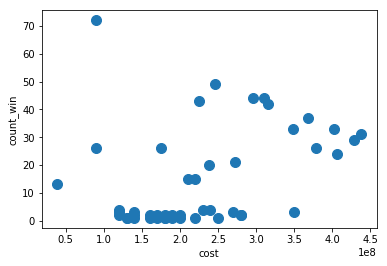

In [15]:
team_for_pd.plot.scatter(x='cost', y='count_win', s=100)

In [17]:
whitened = whiten(team_for_pd.as_matrix())
whitened

array([[ 0.94119212,  4.12670039],
       [ 4.58396222,  1.77677378],
       [ 3.96019716,  1.49019736],
       [ 4.21205864,  1.89140434],
       [ 3.2534358 ,  2.52187246],
       [ 0.94223781,  1.49019736],
       [ 3.09202723,  2.52187246],
       [ 2.57199082,  2.80844887],
       [ 2.48990486,  1.14630566],
       [ 2.85413549,  1.20362095],
       [ 4.24552301,  1.3755668 ],
       [ 0.40153469,  0.74509868],
       [ 3.64246185,  1.89140434],
       [ 3.30788365,  2.40724189],
       [ 4.47834085,  1.66214321],
       [ 1.82647059,  1.49019736],
       [ 2.35053005,  2.46455718],
       [ 3.85390989,  2.12066548],
       [ 2.61574397,  0.05731528],
       [ 2.09259518,  0.11463057],
       [ 2.3018547 ,  0.05731528],
       [ 2.92963325,  0.11463057],
       [ 1.88333566,  0.05731528],
       [ 1.46481663,  0.05731528],
       [ 1.98796542,  0.05731528],
       [ 1.25555711,  0.11463057],
       [ 1.88333566,  0.11463057],
       [ 2.92963325,  0.11463057],
       [ 2.82500349,

In [18]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 3.42257795,  2.23529604],
        [ 2.60393073,  0.51583755],
        [ 1.56866475,  0.19650954]]),
 array([0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2,
        2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
        2]))

In [19]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r',
 'g',
 'g',
 'r',
 'b',
 'r',
 'r',
 'r',
 'g',
 'r',
 'r',
 'g',
 'b',
 'g',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'b',
 'g',
 'b']

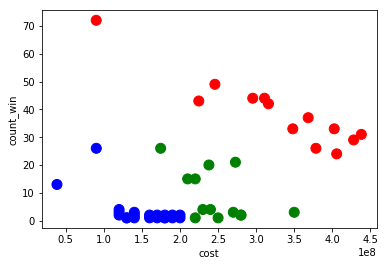

In [20]:
team_for_pd.plot.scatter(x='cost', y='count_win', c=colors, s=100)

In [28]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 2.36086263,  0.52857428],
        [ 3.86298003,  1.96591421],
        [ 2.99241111,  0.12609362],
        [ 1.54525175,  0.13691984],
        [ 1.72648428,  2.47602023]]),
 array([4, 1, 1, 1, 1, 4, 1, 4, 0, 0, 1, 3, 1, 1, 1, 4, 4, 1, 2, 0, 0, 2, 3,
        3, 3, 3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 2,
        3]))

In [29]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'g',
 'g',
 'g',
 'g',
 'm',
 'g',
 'm',
 'r',
 'r',
 'g',
 'y',
 'g',
 'g',
 'g',
 'm',
 'm',
 'g',
 'b',
 'r',
 'r',
 'b',
 'y',
 'y',
 'y',
 'y',
 'y',
 'b',
 'b',
 'y',
 'y',
 'r',
 'y',
 'y',
 'y',
 'y',
 'y',
 'r',
 'y',
 'y',
 'y',
 'y',
 'r',
 'r',
 'r',
 'b',
 'y']

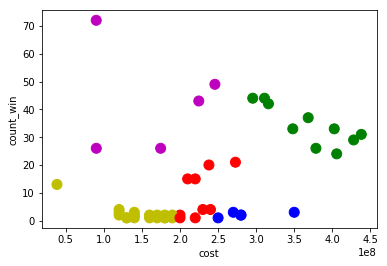

In [30]:
team_for_pd.plot.scatter(x='cost', y='count_win', c=colors, s=100)

In [25]:
centroids , cluster_map = kmeans2(whitened, 4)
centroids, cluster_map

(array([[ 3.25808853,  0.6877834 ],
        [ 3.42257795,  2.23529604],
        [ 1.58038319,  0.25531353],
        [ 2.55084518,  0.3840124 ]]),
 array([1, 1, 1, 1, 1, 2, 1, 1, 3, 0, 1, 2, 1, 1, 1, 2, 1, 1, 3, 2, 3, 3, 2,
        2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 0,
        2]))

In [26]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'g',
 'g',
 'g',
 'g',
 'b',
 'g',
 'g',
 'y',
 'r',
 'g',
 'b',
 'g',
 'g',
 'g',
 'b',
 'g',
 'g',
 'y',
 'b',
 'y',
 'y',
 'b',
 'b',
 'b',
 'b',
 'b',
 'y',
 'y',
 'b',
 'b',
 'y',
 'b',
 'b',
 'b',
 'b',
 'b',
 'y',
 'b',
 'b',
 'b',
 'b',
 'y',
 'y',
 'b',
 'r',
 'b']

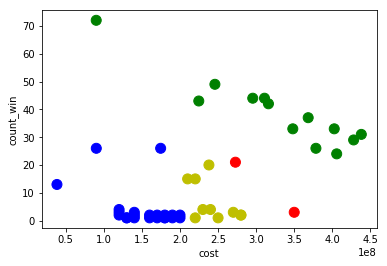

In [27]:
team_for_pd.plot.scatter(x='cost', y='count_win', c=colors, s=100)